<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [35]:
# https://www.datacamp.com/community/tutorials/finance-python-trading

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,7.161565
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,7.086947
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,7.211311
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,7.158698
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,7.100338


In [5]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [6]:
# Alternatively, you can load in a data set that has been retrieved for you already from Yahoo! Finance: 
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


In [7]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [8]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
             Open   High    Low      Close       Volume  Adj Close
2007-01-03  86.29  86.58  81.90  83.800003  309579900.0  11.971429
2007-01-04  84.05  85.95  83.82  85.659996  211815100.0  12.237143
2007-01-05  85.77  86.20  84.40  85.049995  208685400.0  12.150000
2007-01-08  85.96  86.53  85.28  85.470001  199276700.0  12.210000
2007-01-09  86.45  92.98  85.15  92.570000  837324600.0  13.224286
             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.28

In [9]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High     Low       Close       Volume  Adj Close
2008-05-20  181.82  186.16  180.12  185.899994  242462500.0  26.557142
2007-07-09  132.38  132.90  129.18  130.330002  248955000.0  18.618572
2008-04-02  148.78  151.20  145.85  147.489990  261242100.0  21.070000
2009-05-18  123.73  126.70  121.57  126.650002  114710400.0  18.092857
2007-04-27   98.18   99.95   97.69   99.919998  174850900.0  14.274285
2011-09-26  399.86  403.98  391.30  403.170013  203219100.0  57.595715
2009-10-30  196.06  196.80  188.17  188.500000  179381300.0  26.928572
2009-12-21  196.05  199.75  195.67  198.229996  152976600.0  28.318571
2009-05-29  135.39  135.90  133.85  135.809998  114133600.0  19.401428
2008-09-22  139.94  140.25  130.66  131.049988  214178300.0  18.721428
2007-09-04  139.94  145.73  139.84  144.160004  329210700.0  20.594286
2008-07-01  164.23  174.72  164.00  174.680008  277820200.0  24.954287
2010-03-26  228.95  231.95  228.55  230.899994  160218800.0  32.985714
2011-0

In [10]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

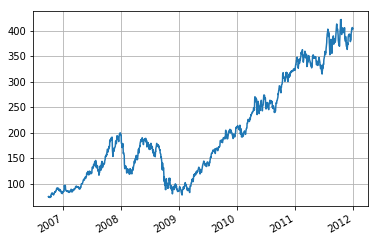

In [11]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [12]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06  -0.005242
2011-12-07

In [13]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Adj Close
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.369611,0.122860
2007-06-30,0.196030,0.195413,0.198331,0.197735,-0.080296,0.197735
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.306882,0.400796
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.172293,0.120394
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,-0.209762,0.003673
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,0.133219,-0.118803
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.161601,-0.360865
2009-06-30,0.312134,0.304359,0.324702,0.316588,-0.386935,0.316588
2009-10-31,0.421239,0.411193,0.425117,0.415901,-0.158270,0.415901


In [14]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06  -0.005242
2011-12-07

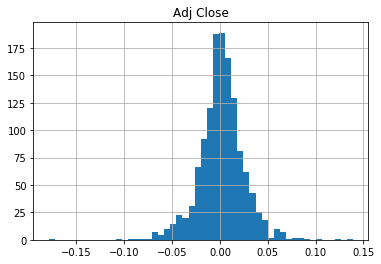

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [15]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [16]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007213
2006-10-17   0.992386
2006-10-18   0.995592
2006-10-19   1.055170
2006-10-20   1.067994
2006-10-23   1.088165
2006-10-24   1.082688
2006-10-25   1.091103
2006-10-26   1.097916
2006-10-27   1.074138
2006-10-30   1.074272
2006-10-31   1.083088
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041545
2011-11-18   5.008550
2011-11-21   4.929335
2011-11-22   5.029522
2011-11-23   4.902351
2011-11-25   4.856666
2011-11-28   5.024313
2011-11-29   4.985306
2011-11-30   5.105530
2011-12-01   5.182074
2011-12-02   5.205718
2011-12-05   5.249934
2011-12-06   5.222415
2011-12-07

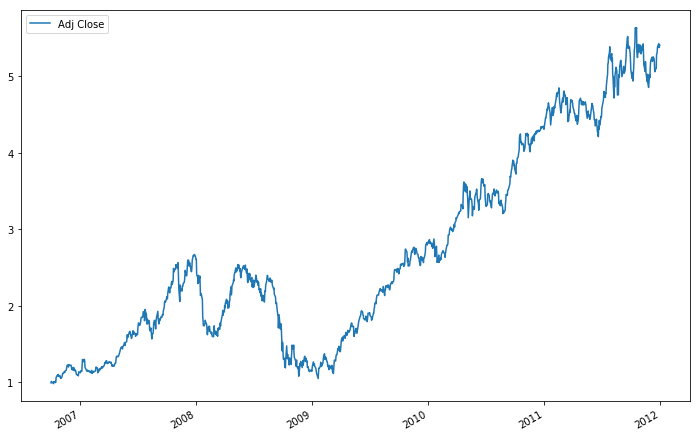

In [17]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [18]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073
2007-08-31   1.734484
2007-09-30   1.897943
2007-10-31   2.295090
2007-11-30   2.333130
2007-12-31   2.544817
2008-01-31   2.142374
2008-02-29   1.671828
2008-03-31   1.747569
2008-04-30   2.113108
2008-05-31   2.468068
2008-06-30   2.384260
2008-07-31   2.240832
2008-08-31   2.285193
2008-09-30   1.886767
2008-10-31   1.322521
2008-11-30   1.254883
2008-12-31   1.222865
2009-01-31   1.185880
2009-02-28   1.256669
2009-03-31   1.302498
...               ...
2009-07-31   1.994633
2009-08-31   2.221219
2009-09-30   2.374922
2009-10-31   2.575893
2009-11-30   2.675929
2009-12-31   2.657688
2010-01-31   2.774716
2010-02-28   2.655568
2010-03-31   2.984383
2010-04-30   3.354910
2010-05-31   3.359090
2010-06-30   3.488451
2010-07-31   3.405691
2010-08-31

In [19]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800.0   
       2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200.0   
       2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700.0   
       2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800.0   
       2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   7.161565  
       2006-10-03   7.086947  
       2006-10-04   7.211311  
       2006-10-05   7.158698  
       2006-10-06   7.100338

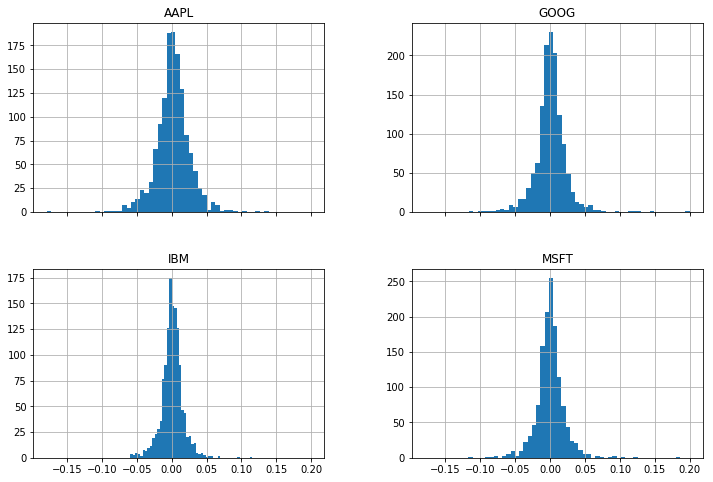

In [20]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

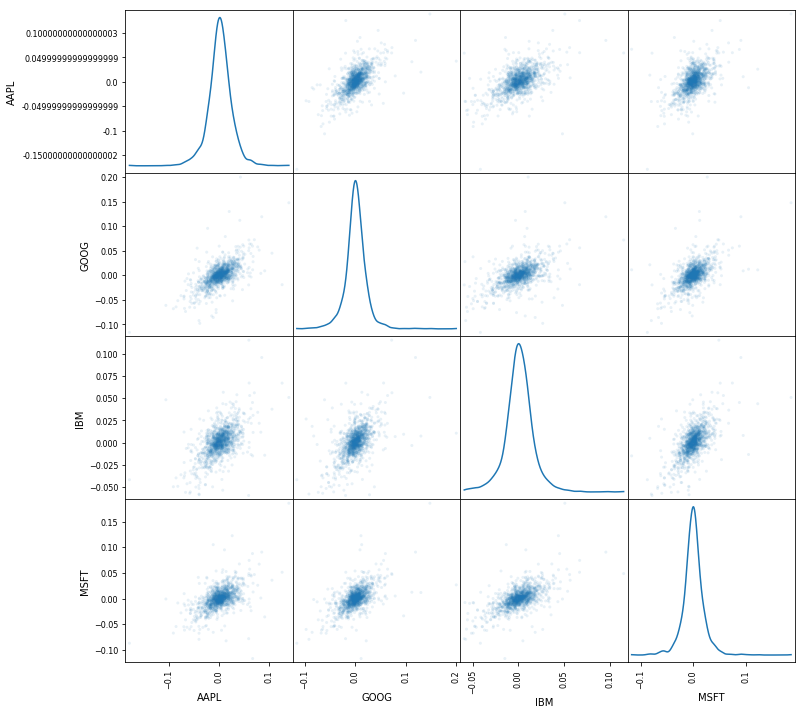

In [21]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [22]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

2011-12-16    55.529679
2011-12-19    55.491607
2011-12-20    55.456536
2011-12-21    55.451822
2011-12-22    55.444500
2011-12-23    55.439643
2011-12-27    55.445286
2011-12-28    55.437643
2011-12-29    55.468393
2011-12-30    55.495500
Name: Adj Close, dtype: float64

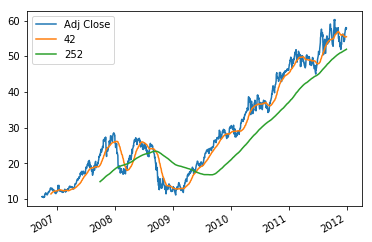

In [23]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

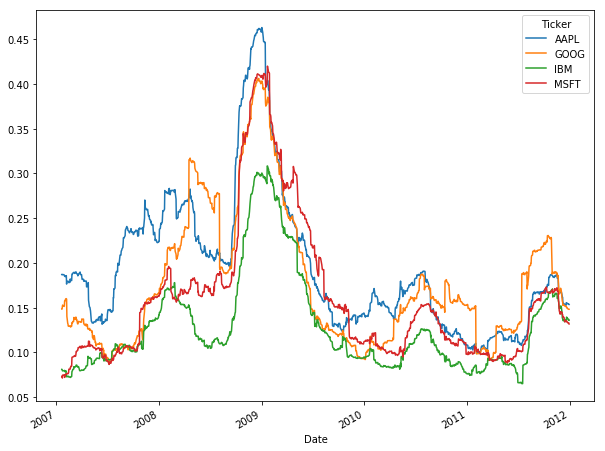

In [24]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [25]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.32e-96
Time:                        00:58:13   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

/Users/adhiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


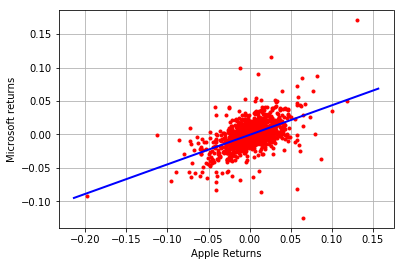

In [26]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()


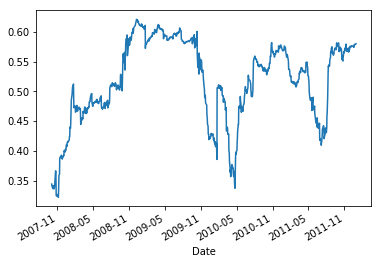

In [27]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

In [28]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

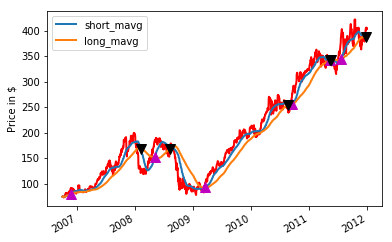

In [29]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


In [30]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

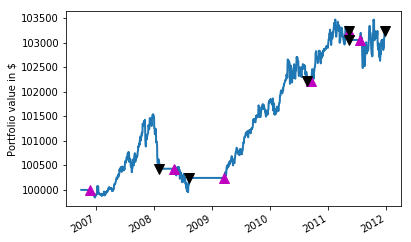

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [32]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7268769500133708


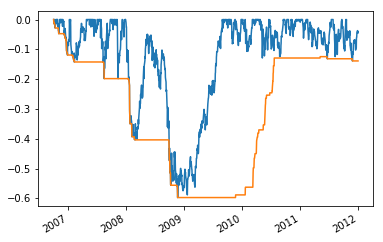

In [33]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [34]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.3823445620598196
